In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_file = ".../data.xlsx"
pharma_df = pd.read_excel(data_file)

print(" Data was collected for Pharmachutical Sector from Screener.in - https://www.screener.in/company/compare/00000046/")
print(" Company Size based Sector (CompType) was defined while taking the data from the above site")

pharma_df.columns = pharma_df.columns.str.strip().str.replace('\n', ' ')
col_dict = {
    'Company Type': 'CompType',
    'Name': 'Name',
    'Current ratio': 'CurrentRatio',
    'Debt to equity ratio': 'DebtEquityRatio',
    'Inventory turnover Ratio': 'InvTurnoverRatio',
    'Operating Margin': 'OperMargin',
    'ROE': 'ROE',
    'Book value per share': 'BookValShare',
    'Price earnings ratio (P/E)': 'PERatio',
    'Market Cap to Sales': 'MarketCapSales',
    'Asset turnaround': 'AssetTurnover',
    'Divident payout ratio': 'DivPayoutRatio'
}
pharma_df.rename(columns=col_dict, inplace=True)
pharma_df.head()


 Data was collected for Pharmachutical Sector from Screener.in - https://www.screener.in/company/compare/00000046/
 Company Size based Sector (CompType) was defined while taking the data from the above site


,CompType,Name,CurrentRatio,DebtEquityRatio,InvTurnoverRatio,OperMargin,ROE,BookValShare,PERatio,MarketCapSales,AssetTurnover,DivPayoutRatio
0,Large,Sun Pharma.Inds.,2.669948,10.719585,1.12,0.282753,16.69,0.004576,43.470308,32.266702,0.58,33.82
1,Large,Divi's Lab.,6.942837,0.075472,1.16,0.317094,15.35,0.020687,76.087483,71.239739,0.58,36.28
2,Large,Cipla,4.239449,2.712915,1.64,0.258748,18.20,0.010213,22.976409,17.589611,0.79,24.51
3,Large,Torrent Pharma.,1.212915,18.483720,1.26,0.322067,24.23,0.026626,66.751124,39.128788,0.74,57.21
4,Large,Mankind Pharma,3.206544,5.178732,2.83,0.276678,19.71,0.030554,56.518014,45.525505,0.89,0.00


# Task
Perform an exploratory data analysis (EDA) on the "pharma_df" dataframe to analyze sectoral segmentation based on financial ratios.

## Group data by sector

### Subtask:
Group the `pharma_df` DataFrame by the `CompType` column.


In [4]:
grouped_pharma_df = pharma_df.groupby('CompType')

## Calculate descriptive statistics

### Subtask:
For each sector, calculate descriptive statistics (mean, median, standard deviation, etc.) for the financial ratios.


In [5]:
sector_stats = grouped_pharma_df.describe().T

## Visualize, Correlation and Key inferences for each metrics
1.   Create visualizations (box plots) to compare the distribution of key financial ratios across different sectors.
2.   Explaination on the inference made from the descriptive stats
3.   Correlation of the variable with each other Ratios across Sectores.




In [6]:
def descreiptive_summary(ratio, sector_stats=sector_stats):
    var_list = [  'CurrentRatio', 'DebtEquityRatio', 'InvTurnoverRatio', 'OperMargin', 'ROE'
            , 'PERatio', 'MarketCapSales', 'AssetTurnover', 'DivPayoutRatio', 'BookValShare'
            ]
    high_corr = []

    print(f"\n--- {ratio} ---")
    ratio_stats = sector_stats.loc[ratio].T
    ratio_stats['range'] = ratio_stats['max'] - ratio_stats['min']
    display(ratio_stats)
    print('\n')

    print(f"Boxplot for {ratio}:")
    plt.figure(figsize=(8, 6))
    sn.boxplot(x='CompType', y=ratio, data=pharma_df)
    plt.title(f'Distribution of {ratio} by Company Type')
    plt.xlabel('Company Type')
    plt.ylabel(ratio)
    plt.show()
    print('\n')

    print(f"Correlation for {ratio}:")
    for a in pharma_df['CompType'].unique().tolist():
      print(f"--- {a} ---")
      sect = pharma_df[pharma_df['CompType']==a].copy()
      test_sect = (sect[var_list].corr())
      df_T = test_sect[test_sect.index==ratio].T
      df_T['ratio_abs'] = abs(df_T[ratio])
      df = df_T.sort_values('ratio_abs', ascending=False).T
      display(df[df.index==ratio].round(4))
      high_corr.append([a, df.columns.to_list()[1], df.iloc[0, 1].round(4), 'Negative' if df.iloc[0, 1] < 0 else 'Positive'])

    return pd.DataFrame(high_corr, columns=['Sector', 'Most_corr_to', 'corr', 'corr_direction'])


CurrentRatio



--- CurrentRatio ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,2.598639,1.471056,1.136210,1.809290,2.272658,2.938246,6.942837,5.806628
Medium,15.0,2.706429,1.776429,0.843697,1.381551,2.055198,3.893234,6.595512,5.751814
Small,15.0,2.399514,1.186842,1.107840,1.513222,2.086324,2.764947,4.813126,3.705286




Boxplot for CurrentRatio:


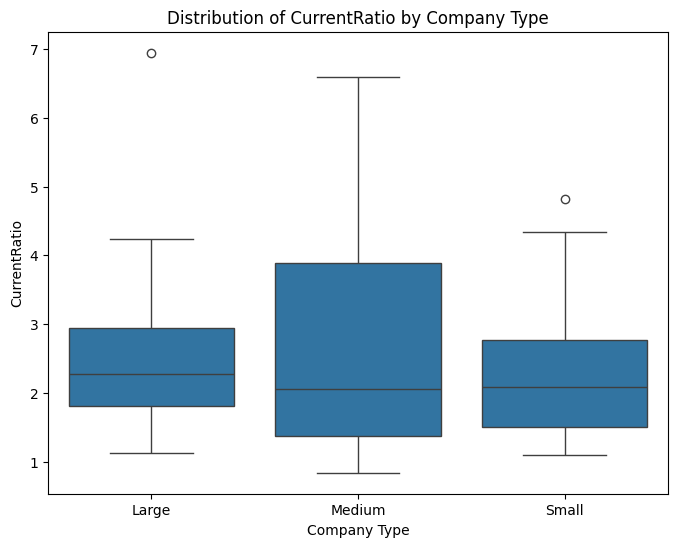



Correlation for CurrentRatio:
--- Large ---


,CurrentRatio,MarketCapSales,DebtEquityRatio,OperMargin,ROE,InvTurnoverRatio,BookValShare,PERatio,AssetTurnover,DivPayoutRatio
CurrentRatio,1.0,0.6332,-0.399,0.3582,0.1621,0.086,0.0741,0.0623,0.035,0.0269


--- Medium ---


,CurrentRatio,OperMargin,ROE,MarketCapSales,DebtEquityRatio,PERatio,BookValShare,DivPayoutRatio,InvTurnoverRatio,AssetTurnover
CurrentRatio,1.0,0.6388,0.4977,0.4818,-0.4458,0.3859,0.3756,0.3111,-0.2703,0.0061


--- Small ---


,CurrentRatio,DebtEquityRatio,OperMargin,BookValShare,MarketCapSales,DivPayoutRatio,ROE,PERatio,AssetTurnover,InvTurnoverRatio
CurrentRatio,1.0,-0.3359,0.3299,-0.2226,0.2184,-0.1363,0.0711,-0.0428,-0.0113,0.0047



Key Inferences :
- Outlier : Boxplot shows that we have an 2 Outliers (in Large and Small Sectors)
 Below are the Ouliers
    CompType              Name  CurrentRatio
1     Large       Divi's Lab.      6.942837
30    Small  Bliss GVS Pharma      4.813126 

- Mean CurrentRatio for all sectors based on Market Size are almost same. 

- Medium Cap has highest CurrentRatio spread with lot of Variablity  

- Small Cap and Large Cap have least CurrentRatio spread with low Variablity  

- Correlation to other Variable : We can see that CurrentRatio is highly correlated to below ratio across different Sectors
    Sector     Most_corr_to    corr corr_direction
0   Large   MarketCapSales  0.6332       Positive
1  Medium       OperMargin  0.6388       Positive
2   Small  DebtEquityRatio -0.3359       Negative


In [7]:
df = descreiptive_summary('CurrentRatio')

outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'CurrentRatio']].sort_values('CurrentRatio', ascending=False).head(1),
                       pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'CurrentRatio']].sort_values('CurrentRatio', ascending=False).head(1)
                       ])
print("\nKey Inferences :")
print("- Outlier : Boxplot shows that we have an 2 Outliers (in Large and Small Sectors)\n Below are the Ouliers\n",outlier_df,"\n")
print("- Mean CurrentRatio for all sectors based on Market Size are almost same.","\n")
print("- Medium Cap has highest CurrentRatio spread with lot of Variablity ","\n")
print("- Small Cap and Large Cap have least CurrentRatio spread with low Variablity ","\n")
print("- Correlation to other Variable : We can see that CurrentRatio is highly correlated to below ratio across different Sectors\n", df)

DebtEquityRatio


--- DebtEquityRatio ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,33.974375,39.369653,0.058733,3.945823,18.483720,57.865083,145.097280,145.038546
Medium,15.0,28.142843,52.409726,0.327916,1.466335,6.275511,27.275805,200.942689,200.614773
Small,15.0,7.714502,9.008455,0.062343,1.801243,3.414579,9.214953,28.048150,27.985807




Boxplot for DebtEquityRatio:


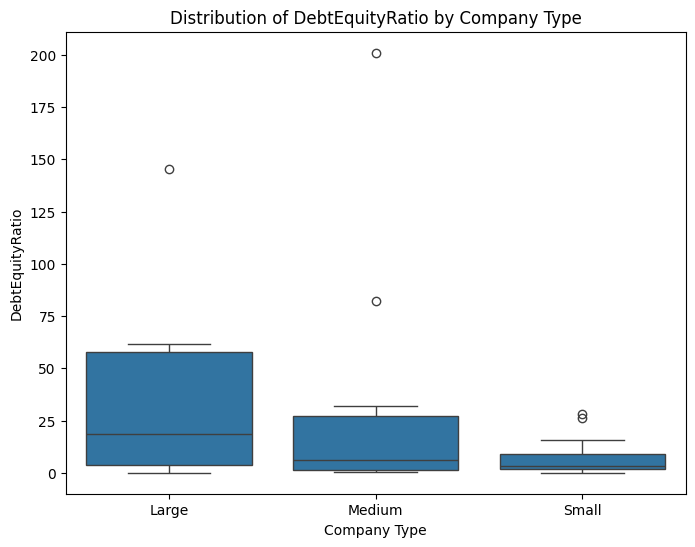



Correlation for DebtEquityRatio:
--- Large ---


,DebtEquityRatio,OperMargin,MarketCapSales,CurrentRatio,DivPayoutRatio,BookValShare,ROE,InvTurnoverRatio,AssetTurnover,PERatio
DebtEquityRatio,1.0,-0.6681,-0.6041,-0.399,-0.3683,-0.3591,-0.3522,-0.2687,-0.2313,-0.0258


--- Medium ---


,DebtEquityRatio,CurrentRatio,AssetTurnover,OperMargin,InvTurnoverRatio,BookValShare,PERatio,ROE,DivPayoutRatio,MarketCapSales
DebtEquityRatio,1.0,-0.4458,0.3409,0.2189,0.2015,-0.1754,-0.1618,-0.1256,0.1199,-0.0821


--- Small ---


,DebtEquityRatio,BookValShare,OperMargin,ROE,MarketCapSales,CurrentRatio,InvTurnoverRatio,DivPayoutRatio,PERatio,AssetTurnover
DebtEquityRatio,1.0,0.5369,-0.4822,-0.3815,-0.3561,-0.3359,-0.3227,-0.1591,-0.0508,0.0024



Key Inferences :
- Outlier : We have outliers in all three Sectors as we can see from Boxplot 
    CompType              Name  DebtEquityRatio
8     Large  Aurobindo Pharma       145.097280
24   Medium  ERIS Lifescience       200.942689
26   Medium  OneSource Speci.        82.381119
44    Small   Nectar Lifesci.        28.048150
39    Small  Bharat Parenter.        26.153846 

- Large Cap has the highest DebtEquityRatio with highest spread and variablility  

- Small Cap has the lowest DebtEquityRatio with lowest spread and variablility  

- Correlation to other Variable : We can see that DebtEquityRatio is highly correlated to below ratio across different Sectors
    Sector  Most_corr_to    corr corr_direction
0   Large    OperMargin -0.6681       Negative
1  Medium  CurrentRatio -0.4458       Negative
2   Small  BookValShare  0.5369       Positive


In [8]:
df = descreiptive_summary('DebtEquityRatio')

outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'DebtEquityRatio']].sort_values('DebtEquityRatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'DebtEquityRatio']].sort_values('DebtEquityRatio', ascending=False).head(2),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'DebtEquityRatio']].sort_values('DebtEquityRatio', ascending=False).head(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : We have outliers in all three Sectors as we can see from Boxplot", "\n", outlier_df, "\n")
print("- Large Cap has the highest DebtEquityRatio with highest spread and variablility ","\n")
print("- Small Cap has the lowest DebtEquityRatio with lowest spread and variablility ","\n")
print("- Correlation to other Variable : We can see that DebtEquityRatio is highly correlated to below ratio across different Sectors\n", df)

InvTurnoverRatio


--- InvTurnoverRatio ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,1.856667,0.946178,1.05,1.285,1.48,1.935,4.66,3.61
Medium,15.0,2.014000,0.910053,0.91,1.355,1.78,2.500,4.40,3.49
Small,15.0,5.900000,6.955588,1.38,2.145,3.01,5.995,27.00,25.62




Boxplot for InvTurnoverRatio:


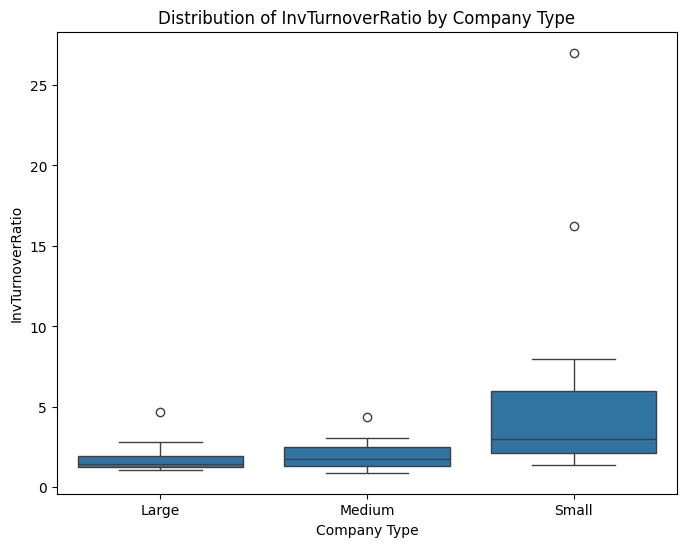



Correlation for InvTurnoverRatio:
--- Large ---


,InvTurnoverRatio,AssetTurnover,BookValShare,DivPayoutRatio,ROE,MarketCapSales,DebtEquityRatio,OperMargin,PERatio,CurrentRatio
InvTurnoverRatio,1.0,0.6468,0.5081,0.4497,0.3359,0.2989,-0.2687,0.1426,0.091,0.086


--- Medium ---


,InvTurnoverRatio,CurrentRatio,BookValShare,DivPayoutRatio,DebtEquityRatio,AssetTurnover,MarketCapSales,OperMargin,PERatio,ROE
InvTurnoverRatio,1.0,-0.2703,0.2411,0.2212,0.2015,0.1851,0.136,0.0608,-0.0325,0.002


--- Small ---


,InvTurnoverRatio,MarketCapSales,DebtEquityRatio,ROE,DivPayoutRatio,PERatio,BookValShare,OperMargin,AssetTurnover,CurrentRatio
InvTurnoverRatio,1.0,0.4322,-0.3227,0.2936,-0.1929,0.1727,-0.0736,0.0643,0.0087,0.0047



Key Inferences :
- Outlier : We have outliers in all three Sectors as we can see from Boxplot 
    CompType            Name  InvTurnoverRatio
9     Large    Abbott India              4.66
29   Medium        Sai Life              4.40
40    Small   Kilitch Drugs             27.00
42    Small  Shukra Pharma.             16.26 

- Large Cap has the lowest InvTurnoverRatio with least spread and variablility.
  This means the Operation in Large cap Companies are efficient with Good Inventory Turnaround Ratio 

- Small Cap has the highest InvTurnoverRatio (low operational efficiency) with highest spread and variablility. 

- Correlation to other Variable : We can see that InvTurnoverRatio is highly correlated to below ratio across different Sectors
    Sector    Most_corr_to    corr corr_direction
0   Large   AssetTurnover  0.6468       Positive
1  Medium    CurrentRatio -0.2703       Negative
2   Small  MarketCapSales  0.4322       Positive


In [9]:
df = descreiptive_summary('InvTurnoverRatio')

outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'InvTurnoverRatio']].sort_values('InvTurnoverRatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'InvTurnoverRatio']].sort_values('InvTurnoverRatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'InvTurnoverRatio']].sort_values('InvTurnoverRatio', ascending=False).head(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : We have outliers in all three Sectors as we can see from Boxplot", "\n", outlier_df,"\n")
print("- Large Cap has the lowest InvTurnoverRatio with least spread and variablility.")
print("  This means the Operation in Large cap Companies are efficient with Good Inventory Turnaround Ratio","\n")
print("- Small Cap has the highest InvTurnoverRatio (low operational efficiency) with highest spread and variablility.","\n")
print("- Correlation to other Variable : We can see that InvTurnoverRatio is highly correlated to below ratio across different Sectors\n", df)

OperMargin


--- OperMargin ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,0.253238,0.049505,0.174787,0.207584,0.261828,0.288888,0.322067,0.147280
Medium,15.0,0.242994,0.092707,0.090940,0.171002,0.237776,0.318450,0.413342,0.322403
Small,15.0,0.167438,0.096922,0.007932,0.113939,0.129570,0.200038,0.381019,0.373087




Boxplot for OperMargin:


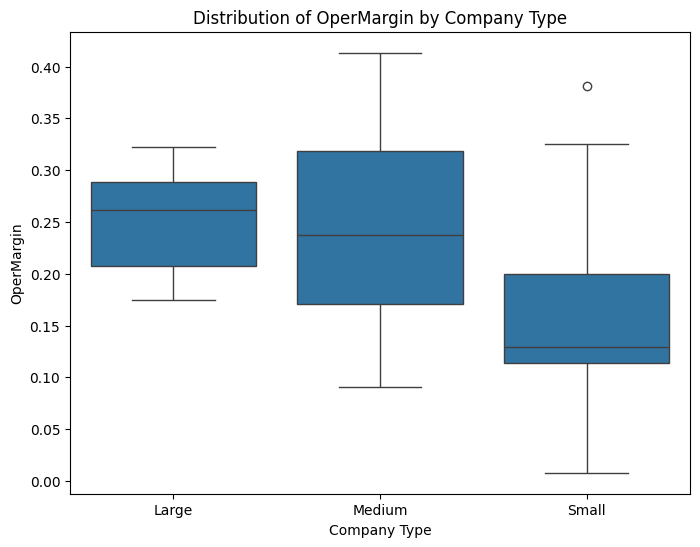



Correlation for OperMargin:
--- Large ---


,OperMargin,MarketCapSales,DebtEquityRatio,ROE,BookValShare,DivPayoutRatio,CurrentRatio,AssetTurnover,PERatio,InvTurnoverRatio
OperMargin,1.0,0.7308,-0.6681,0.6273,0.5089,0.5026,0.3582,0.2635,-0.1454,0.1426


--- Medium ---


,OperMargin,CurrentRatio,MarketCapSales,ROE,PERatio,BookValShare,AssetTurnover,DebtEquityRatio,DivPayoutRatio,InvTurnoverRatio
OperMargin,1.0,0.6388,0.5824,0.4372,0.395,0.2369,0.2244,0.2189,0.2156,0.0608


--- Small ---


,OperMargin,MarketCapSales,DebtEquityRatio,DivPayoutRatio,CurrentRatio,ROE,PERatio,AssetTurnover,BookValShare,InvTurnoverRatio
OperMargin,1.0,0.6593,-0.4822,0.466,0.3299,0.318,0.2223,0.1875,-0.0698,0.0643



Key Inferences :
- Outlier : Only Small Sector had 1 Outlier 
    CompType              Name  OperMargin
33    Small  Shree Ganesh Rem    0.381019 

- Large Cap has the highest OperMargin with least spread and variablility  

- Medium Cap has the second highest OperMargin with highest spread and variablility  

- Small Cap has the lowest OperMargin 

- Correlation to other Variable : We can see that OperMargin is highly correlated to below ratio across different Sectors
    Sector    Most_corr_to    corr corr_direction
0   Large  MarketCapSales  0.7308       Positive
1  Medium    CurrentRatio  0.6388       Positive
2   Small  MarketCapSales  0.6593       Positive


In [10]:
df = descreiptive_summary('OperMargin')

outlier_df = pd.concat([
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'OperMargin']].sort_values('OperMargin', ascending=False).head(1)
                       ])

print("\nKey Inferences :")
print("- Outlier : Only Small Sector had 1 Outlier","\n", outlier_df, "\n")
print("- Large Cap has the highest OperMargin with least spread and variablility ","\n")
print("- Medium Cap has the second highest OperMargin with highest spread and variablility ","\n")
print("- Small Cap has the lowest OperMargin","\n")
print("- Correlation to other Variable : We can see that OperMargin is highly correlated to below ratio across different Sectors\n", df)

ROE


--- ROE ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,15.562,21.256707,-50.87,13.440,18.30,20.755,49.57,100.44
Medium,15.0,12.446,9.809980,-12.10,8.805,14.11,19.605,25.59,37.69
Small,15.0,15.590,19.678200,-5.59,5.570,8.36,18.260,70.01,75.60




Boxplot for ROE:


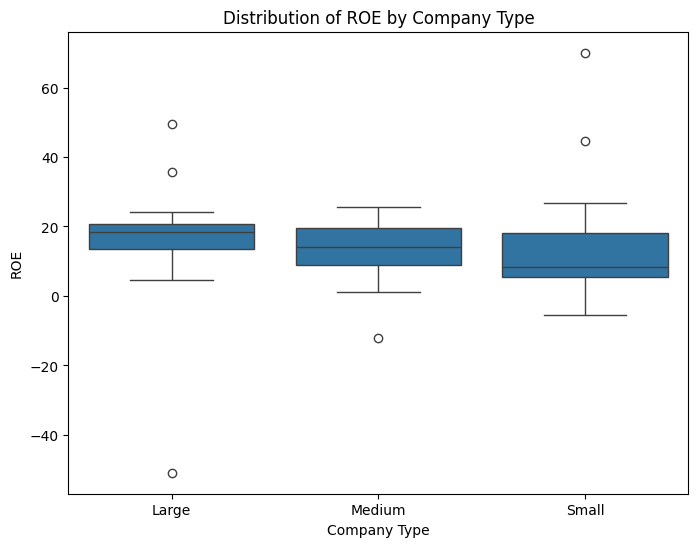



Correlation for ROE:
--- Large ---


,ROE,BookValShare,AssetTurnover,PERatio,OperMargin,DivPayoutRatio,MarketCapSales,DebtEquityRatio,InvTurnoverRatio,CurrentRatio
ROE,1.0,0.8768,0.8383,-0.6433,0.6273,0.5507,0.4301,-0.3522,0.3359,0.1621


--- Medium ---


,ROE,BookValShare,AssetTurnover,DivPayoutRatio,CurrentRatio,OperMargin,MarketCapSales,DebtEquityRatio,PERatio,InvTurnoverRatio
ROE,1.0,0.736,0.6878,0.5565,0.4977,0.4372,0.149,-0.1256,0.1256,0.002


--- Small ---


,ROE,MarketCapSales,DebtEquityRatio,OperMargin,InvTurnoverRatio,PERatio,DivPayoutRatio,BookValShare,AssetTurnover,CurrentRatio
ROE,1.0,0.4184,-0.3815,0.318,0.2936,0.1919,-0.0963,-0.0929,-0.0806,0.0711



Key Inferences :
- Outlier :  
    CompType              Name    ROE
11    Large  Glaxosmi. Pharma  49.57
9     Large      Abbott India  35.66
12    Large  Glenmark Pharma. -50.87
21   Medium         Wockhardt -12.10
32    Small           Wanbury  70.01
42    Small    Shukra Pharma.  44.71 

- Large Cap has the better ROE than Medium and Small Cap 

- All Sectors have low variablity in ROE 

- Correlation to other Variable : We can see that ROE is highly correlated to below ratio across different Sectors
    Sector    Most_corr_to    corr corr_direction
0   Large    BookValShare  0.8768       Positive
1  Medium    BookValShare  0.7360       Positive
2   Small  MarketCapSales  0.4184       Positive


In [11]:
df = descreiptive_summary('ROE')

outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'ROE']].sort_values('ROE', ascending=False).head(2),
                        pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'ROE']].sort_values('ROE', ascending=False).tail(1),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'ROE']].sort_values('ROE', ascending=False).tail(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'ROE']].sort_values('ROE', ascending=False).head(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- Large Cap has the better ROE than Medium and Small Cap","\n")
print("- All Sectors have low variablity in ROE","\n")
print("- Correlation to other Variable : We can see that ROE is highly correlated to below ratio across different Sectors\n", df)

PERatio


--- PERatio ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,48.040740,40.615594,-6.377302,23.254367,43.470308,60.539953,171.635071,178.012373
Medium,15.0,114.462514,439.678057,-581.496815,19.302389,31.330490,72.305607,1564.057971,2145.554786
Small,15.0,24.857748,37.762899,-57.419531,15.058987,32.709227,37.385151,108.136364,165.555894




Boxplot for PERatio:


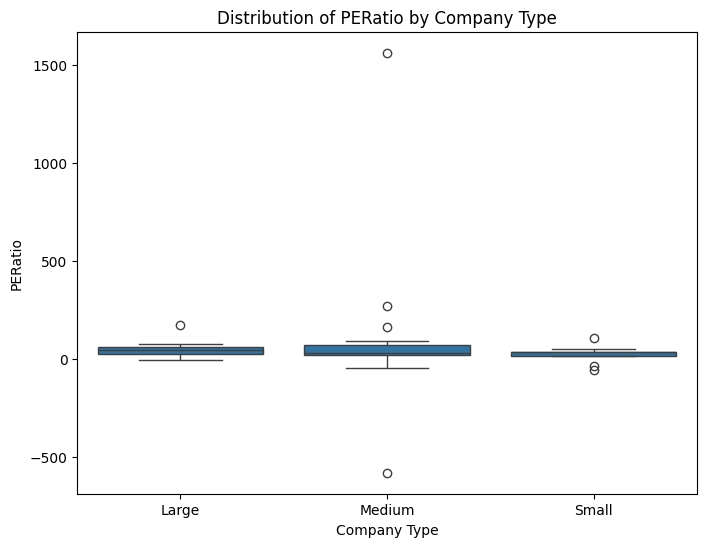



Correlation for PERatio:
--- Large ---


,PERatio,ROE,AssetTurnover,BookValShare,MarketCapSales,OperMargin,DivPayoutRatio,InvTurnoverRatio,CurrentRatio,DebtEquityRatio
PERatio,1.0,-0.6433,-0.5402,-0.3627,0.2164,-0.1454,0.1257,0.091,0.0623,-0.0258


--- Medium ---


,PERatio,MarketCapSales,OperMargin,CurrentRatio,BookValShare,DivPayoutRatio,DebtEquityRatio,ROE,AssetTurnover,InvTurnoverRatio
PERatio,1.0,0.8477,0.395,0.3859,0.2983,0.2107,-0.1618,0.1256,0.0843,-0.0325


--- Small ---


,PERatio,AssetTurnover,BookValShare,DivPayoutRatio,OperMargin,ROE,InvTurnoverRatio,MarketCapSales,DebtEquityRatio,CurrentRatio
PERatio,1.0,-0.6883,0.6681,0.2684,0.2223,0.1919,0.1727,0.0671,-0.0508,-0.0428



Key Inferences :
- Outlier :  
    CompType              Name      PERatio
12    Large  Glenmark Pharma.   171.635071
17   Medium      Suven Pharma  1564.057971
25   Medium  Astrazeneca Phar   271.946565
22   Medium            Pfizer   160.480000
27   Medium    Alembic Pharma  -581.496815
44    Small   Nectar Lifesci.   108.136364
35    Small  Fermenta Biotec.   -38.667092
39    Small  Bharat Parenter.   -57.419531 

- PERatio is almost same for Large Cap, Medium Cap and Small Cap with low variability across different Sectors 

- Correlation to other Variable : We can see that PERatio is highly correlated to below ratio across different Sectors
    Sector    Most_corr_to    corr corr_direction
0   Large             ROE -0.6433       Negative
1  Medium  MarketCapSales  0.8477       Positive
2   Small   AssetTurnover -0.6883       Negative


In [12]:
df = descreiptive_summary('PERatio')

outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'PERatio']].sort_values('PERatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'PERatio']].sort_values('PERatio', ascending=False).head(3),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'PERatio']].sort_values('PERatio', ascending=False).tail(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'PERatio']].sort_values('PERatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'PERatio']].sort_values('PERatio', ascending=False).tail(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- PERatio is almost same for Large Cap, Medium Cap and Small Cap with low variability across different Sectors","\n")
print("- Correlation to other Variable : We can see that PERatio is highly correlated to below ratio across different Sectors\n", df)

MarketCapSales


--- MarketCapSales ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,27.397677,18.371998,9.104650,14.389820,17.589611,39.829172,71.239739,62.135089
Medium,15.0,34.777833,24.183214,10.683786,20.161863,29.123718,43.260701,104.808439,94.124653
Small,15.0,15.143850,20.375242,0.460000,6.466022,8.358433,14.024871,84.211921,83.751921




Boxplot for MarketCapSales:


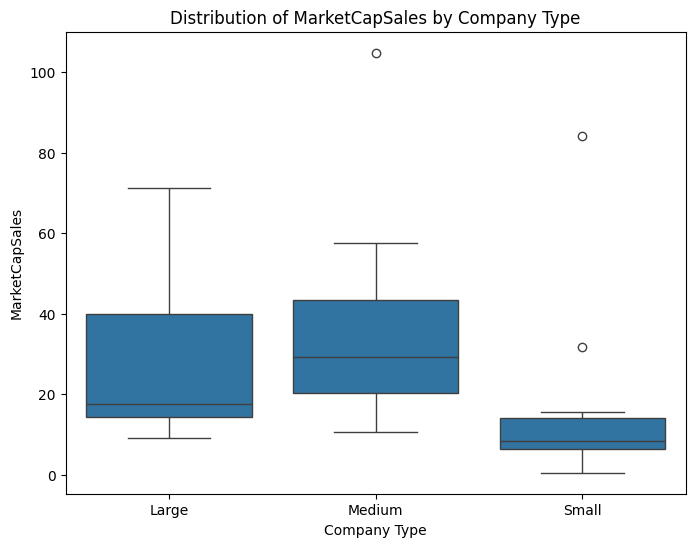



Correlation for MarketCapSales:
--- Large ---


,MarketCapSales,OperMargin,CurrentRatio,DebtEquityRatio,DivPayoutRatio,BookValShare,ROE,InvTurnoverRatio,AssetTurnover,PERatio
MarketCapSales,1.0,0.7308,0.6332,-0.6041,0.5631,0.513,0.4301,0.2989,0.2279,0.2164


--- Medium ---


,MarketCapSales,PERatio,OperMargin,CurrentRatio,BookValShare,ROE,InvTurnoverRatio,DivPayoutRatio,DebtEquityRatio,AssetTurnover
MarketCapSales,1.0,0.8477,0.5824,0.4818,0.4126,0.149,0.136,0.0979,-0.0821,-0.0474


--- Small ---


,MarketCapSales,OperMargin,InvTurnoverRatio,ROE,AssetTurnover,DebtEquityRatio,CurrentRatio,PERatio,BookValShare,DivPayoutRatio
MarketCapSales,1.0,0.6593,0.4322,0.4184,0.3854,-0.3561,0.2184,0.0671,-0.0394,0.0198



Key Inferences :
- Outlier :  
    CompType              Name  MarketCapSales
17   Medium      Suven Pharma      104.808439
42    Small    Shukra Pharma.       84.211921
33    Small  Shree Ganesh Rem       31.670426 

- Surprisingly Medium Cap has highest MarketCapSales ratio than Large Cap and Small 
  This means the Market valuation for Medium cap are overpriced compared to their sales  

- Correlation to other Variable : We can see that MarketCapSales is highly correlated to below ratio across different Sectors
    Sector Most_corr_to    corr corr_direction
0   Large   OperMargin  0.7308       Positive
1  Medium      PERatio  0.8477       Positive
2   Small   OperMargin  0.6593       Positive


In [13]:
df = descreiptive_summary('MarketCapSales')

outlier_df = pd.concat([
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'MarketCapSales']].sort_values('MarketCapSales', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'MarketCapSales']].sort_values('MarketCapSales', ascending=False).head(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- Surprisingly Medium Cap has highest MarketCapSales ratio than Large Cap and Small ")
print("  This means the Market valuation for Medium cap are overpriced compared to their sales ","\n")
print("- Correlation to other Variable : We can see that MarketCapSales is highly correlated to below ratio across different Sectors\n", df)

AssetTurnover


--- AssetTurnover ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,0.755333,0.198957,0.27,0.695,0.74,0.860,1.15,0.88
Medium,15.0,0.688000,0.271877,0.32,0.515,0.63,0.935,1.26,0.94
Small,15.0,0.876000,0.412255,0.00,0.690,0.77,1.090,1.87,1.87




Boxplot for AssetTurnover:


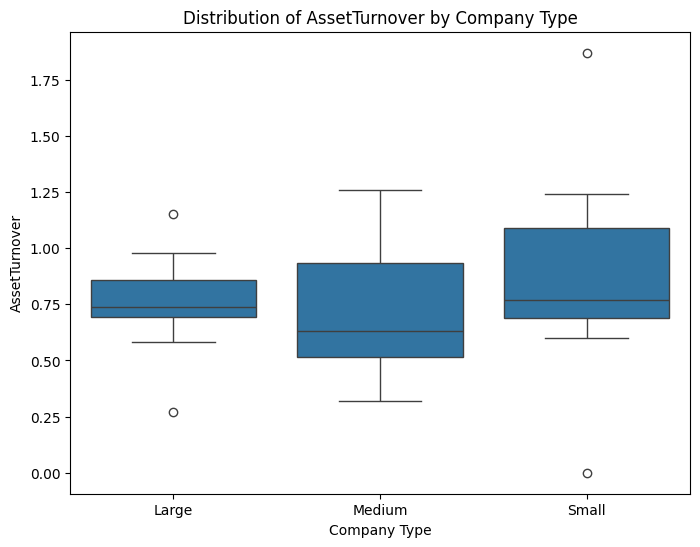



Correlation for AssetTurnover:
--- Large ---


,AssetTurnover,ROE,BookValShare,InvTurnoverRatio,PERatio,DivPayoutRatio,OperMargin,DebtEquityRatio,MarketCapSales,CurrentRatio
AssetTurnover,1.0,0.8383,0.8025,0.6468,-0.5402,0.4364,0.2635,-0.2313,0.2279,0.035


--- Medium ---


,AssetTurnover,ROE,DivPayoutRatio,BookValShare,DebtEquityRatio,OperMargin,InvTurnoverRatio,PERatio,MarketCapSales,CurrentRatio
AssetTurnover,1.0,0.6878,0.604,0.415,0.3409,0.2244,0.1851,0.0843,-0.0474,0.0061


--- Small ---


,AssetTurnover,PERatio,BookValShare,MarketCapSales,DivPayoutRatio,OperMargin,ROE,CurrentRatio,InvTurnoverRatio,DebtEquityRatio
AssetTurnover,1.0,-0.6883,-0.5949,0.3854,0.2415,0.1875,-0.0806,-0.0113,0.0087,0.0024



Key Inferences :
- Outlier :  
    CompType              Name  AssetTurnover
9     Large      Abbott India           1.15
12    Large  Glenmark Pharma.           0.27
39    Small  Bharat Parenter.           1.87
44    Small   Nectar Lifesci.           0.00 

- We see from BoxPlot that Medium Cap has highest AssetTurnover than Large Cap and Small.
  Large cap has low Variability in AssetTurnover Ratio when Outlier are removed. 

- Correlation to other Variable : We can see that AssetTurnover is highly correlated to below ratio across different Sectors
    Sector Most_corr_to    corr corr_direction
0   Large          ROE  0.8383       Positive
1  Medium          ROE  0.6878       Positive
2   Small      PERatio -0.6883       Negative


In [14]:
df = descreiptive_summary('AssetTurnover')
outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'AssetTurnover']].sort_values('AssetTurnover', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'AssetTurnover']].sort_values('AssetTurnover', ascending=False).tail(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'AssetTurnover']].sort_values('AssetTurnover', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'AssetTurnover']].sort_values('AssetTurnover', ascending=False).tail(1)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- We see from BoxPlot that Medium Cap has highest AssetTurnover than Large Cap and Small.")
print("  Large cap has low Variability in AssetTurnover Ratio when Outlier are removed.","\n")
print("- Correlation to other Variable : We can see that AssetTurnover is highly correlated to below ratio across different Sectors\n", df)

DivPayoutRatio


--- DivPayoutRatio ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,31.036667,36.950149,-4.7,10.0550,18.540,35.050,142.46,147.16
Medium,15.0,18.792000,15.975045,0.0,3.6350,20.070,33.545,42.64,42.64
Small,14.0,25.268571,56.929103,0.0,1.4875,8.495,11.540,214.75,214.75




Boxplot for DivPayoutRatio:


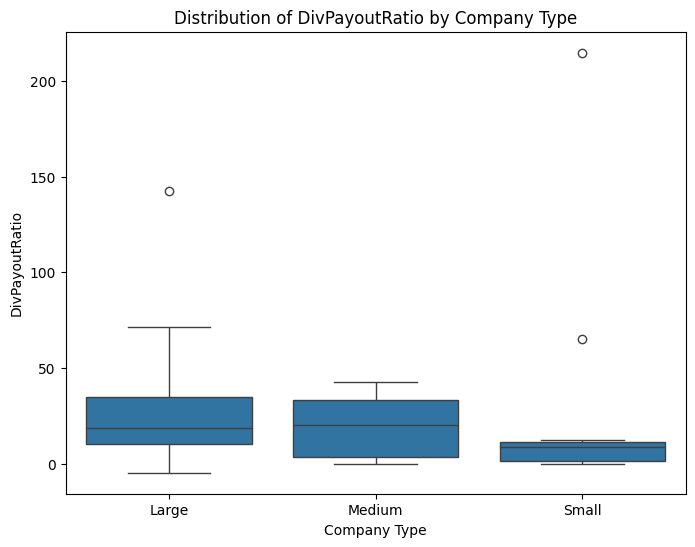



Correlation for DivPayoutRatio:
--- Large ---


,DivPayoutRatio,BookValShare,MarketCapSales,ROE,OperMargin,InvTurnoverRatio,AssetTurnover,DebtEquityRatio,PERatio,CurrentRatio
DivPayoutRatio,1.0,0.8039,0.5631,0.5507,0.5026,0.4497,0.4364,-0.3683,0.1257,0.0269


--- Medium ---


,DivPayoutRatio,AssetTurnover,ROE,BookValShare,CurrentRatio,InvTurnoverRatio,OperMargin,PERatio,DebtEquityRatio,MarketCapSales
DivPayoutRatio,1.0,0.604,0.5565,0.4665,0.3111,0.2212,0.2156,0.2107,0.1199,0.0979


--- Small ---


,DivPayoutRatio,OperMargin,PERatio,AssetTurnover,InvTurnoverRatio,DebtEquityRatio,CurrentRatio,ROE,BookValShare,MarketCapSales
DivPayoutRatio,1.0,0.466,0.2684,0.2415,-0.1929,-0.1591,-0.1363,-0.0963,-0.0689,0.0198



Key Inferences :
- Outlier :  
    CompType              Name  DivPayoutRatio
11    Large  Glaxosmi. Pharma          142.46
41    Small  Sakar Healthcare          214.75
33    Small  Shree Ganesh Rem           65.08 

- Divident payout ratio is highest for Large and Medium Cap and lowest for Small Cap.
  Small Cap has two Outlier with very High Divident payout ratio. 

- Correlation to other Variable : We can see that DivPayoutRatio is highly correlated to below ratio across different Sectors
    Sector   Most_corr_to    corr corr_direction
0   Large   BookValShare  0.8039       Positive
1  Medium  AssetTurnover  0.6040       Positive
2   Small     OperMargin  0.4660       Positive


In [15]:
df = descreiptive_summary('DivPayoutRatio')
outlier_df = pd.concat([
                        pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'DivPayoutRatio']].sort_values('DivPayoutRatio', ascending=False).head(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'DivPayoutRatio']].sort_values('DivPayoutRatio', ascending=False).head(2)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- Divident payout ratio is highest for Large and Medium Cap and lowest for Small Cap.") 
print("  Small Cap has two Outlier with very High Divident payout ratio.","\n")
print("- Correlation to other Variable : We can see that DivPayoutRatio is highly correlated to below ratio across different Sectors\n", df)

BookValShare


--- BookValShare ---


,count,mean,std,min,25%,50%,75%,max,range
CompType,,,,,,,,,
Large,15.0,0.024044,0.052710,-0.088674,0.007873,0.015778,0.028590,0.168411,0.257085
Medium,15.0,0.080028,0.124782,-0.179259,0.030293,0.071307,0.101795,0.422508,0.601767
Small,15.0,8.847817,27.939092,-7.081481,0.467199,0.893497,1.975385,108.136364,115.217845




Boxplot for BookValShare:


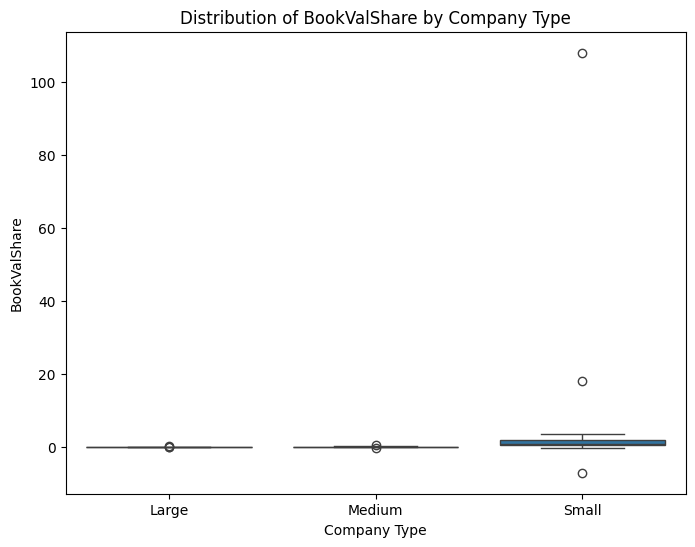



Correlation for BookValShare:
--- Large ---


,BookValShare,ROE,DivPayoutRatio,AssetTurnover,MarketCapSales,OperMargin,InvTurnoverRatio,PERatio,DebtEquityRatio,CurrentRatio
BookValShare,1.0,0.8768,0.8039,0.8025,0.513,0.5089,0.5081,-0.3627,-0.3591,0.0741


--- Medium ---


,BookValShare,ROE,DivPayoutRatio,AssetTurnover,MarketCapSales,CurrentRatio,PERatio,InvTurnoverRatio,OperMargin,DebtEquityRatio
BookValShare,1.0,0.736,0.4665,0.415,0.4126,0.3756,0.2983,0.2411,0.2369,-0.1754


--- Small ---


,BookValShare,PERatio,AssetTurnover,DebtEquityRatio,CurrentRatio,ROE,InvTurnoverRatio,OperMargin,DivPayoutRatio,MarketCapSales
BookValShare,1.0,0.6681,-0.5949,0.5369,-0.2226,-0.0929,-0.0736,-0.0698,-0.0689,-0.0394



Key Inferences :
- Outlier :  
    CompType              Name  BookValShare
11    Large  Glaxosmi. Pharma      0.168411
9     Large      Abbott India      0.084173
0     Large  Sun Pharma.Inds.      0.004576
12    Large  Glenmark Pharma.     -0.088674
25   Medium  Astrazeneca Phar      0.422508
28   Medium   Concord Biotech      0.185606
21   Medium         Wockhardt     -0.179259
44    Small   Nectar Lifesci.    108.136364
42    Small    Shukra Pharma.     18.211813
39    Small  Bharat Parenter.     -7.081481 

- Book Value per Share is almost same for all the Sectors 

- Correlation to other Variable : We can see that BookValShare is highly correlated to below ratio across different Sectors
    Sector Most_corr_to    corr corr_direction
0   Large          ROE  0.8768       Positive
1  Medium          ROE  0.7360       Positive
2   Small      PERatio  0.6681       Positive


In [16]:
df = descreiptive_summary('BookValShare')
outlier_df = pd.concat([pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).head(2),
                        pharma_df[pharma_df.CompType=='Large'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).tail(2),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).head(2),
                        pharma_df[pharma_df.CompType=='Medium'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).tail(1),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).head(2),
                        pharma_df[pharma_df.CompType=='Small'][['CompType', 'Name', 'BookValShare']].sort_values('BookValShare', ascending=False).tail(1)
                       ])

print("\nKey Inferences :")
print("- Outlier : ","\n",outlier_df,"\n")
print("- Book Value per Share is almost same for all the Sectors","\n")
print("- Correlation to other Variable : We can see that BookValShare is highly correlated to below ratio across different Sectors\n", df)